# Exploration of hormonal receptor genes in Polioudakis et al human fetal brain dataset - Metacell calculation by SeaCells

[Reference paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6831089/#SD1) : *We focus on the cortical anlage at mid-gestation (gestation week (GW) 17 to 18) because this period contains the major germinal zones and the developing cortical laminae containing migrating and newly born neurons, and neurodevelopmental processes occurring during this epoch are implicated in neuropsychiatric disease. To optimize detection of distinct cell types, prior to single-cell isolation we separated the cortex into:
the germinal zones (ventricular zone (VZ) and subventricular zone (SVZ)) and developing cortex (subplate (SP) and cortical plate (CP)).*

# 1. Environment

## 1.1 Modules

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import scanpy as sc

import pickle

#Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#utils
import ipynbname
from datetime import datetime

# SeaCell
import SEACells

#import custom functions
sys.path.append('../')
import functions as fn

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [2]:
# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [3.5, 3.5]
matplotlib.rcParams['figure.dpi'] = 100

In [3]:
print("Scanpy version: ", sc.__version__)
print("Pandas version: ", pd.__version__)
print("SEACell version: ", SEACells.__version__)

Scanpy version:  1.9.3
Pandas version:  2.0.0
SEACell version:  0.3.3


## 1.2 Settings


In [5]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80)

## 1.3 Files and parameters

In [4]:
input_file = '../../../../DataDir/ExternalData/SingleCellData/PolioudakisAdata_Metacells.h5ad'

## 1.4 Start computations

In [5]:
print(datetime.now())

2025-07-23 16:31:07.460253


----

# 2. Data Load


## 2.1 Read adata metacells file

In [6]:
adata = sc.read(input_file)
adata

AnnData object with n_obs × n_vars = 366 × 17263
    obs: 'cell_label', 'cell_label_purity', 'agg_sample_id'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_label_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'lognorm', 'raw'
    obsp: 'connectivities', 'distances'

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


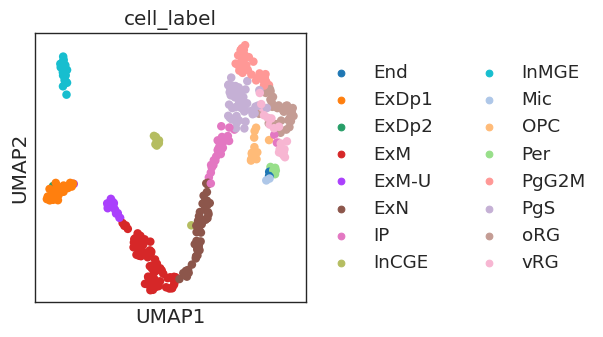

In [7]:
sc.pl.umap(adata, color=['cell_label'], s=150)

# 3. Exploration of hormonal receptor gene signature expression

In [8]:
signatures = '../../../../DataDir/ExternalData/Receptors/ReceptorsComplete.txt'
sig = pd.read_csv(signatures, sep="\t", keep_default_na=False)  
genes = sig["GeneName"].values.tolist()


The following marker genes are missing:  {'RARB', 'PTGER1', 'AHR', 'THRSP', 'CYP19A1', 'ESR1', 'DIO1', 'PGR', 'PTGER2', 'ESRRB', 'PPARG', 'PTGER3', 'PTGER4', 'VDR', 'DIO3', 'AR', 'RXRG', 'GPER1'}


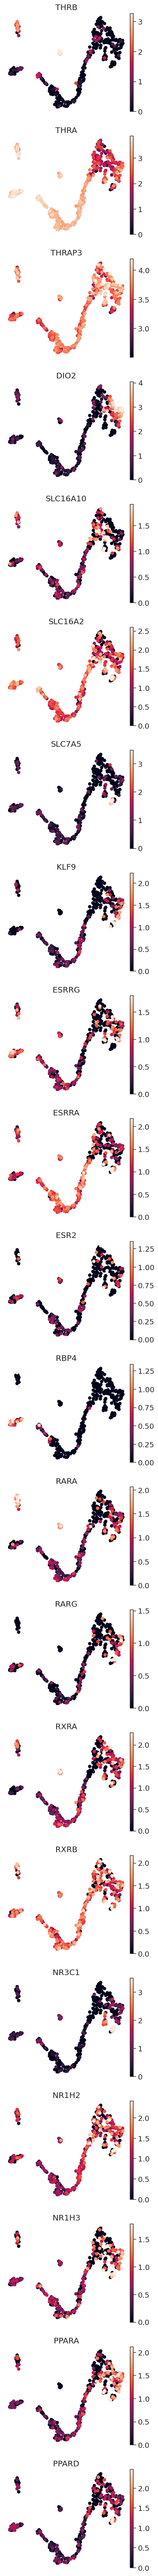

In [9]:
fn.CustomUmap(adata, genes, embedding="X_umap", s=150) 

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


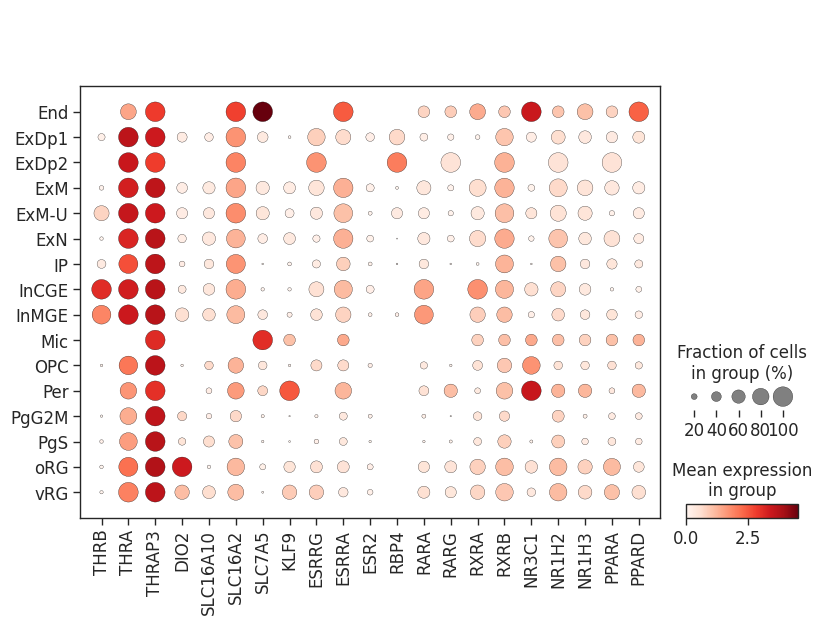

In [10]:
available_genes = [gene for gene in genes if gene in adata.var_names]

if available_genes:
    sc.pl.dotplot(adata, available_genes, groupby='cell_label')
else:
    print("None of the specified genes are found in adata.var_names.")

# 4 Save in other formats

In [14]:
print(datetime.now())

2025-07-23 16:35:03.436921


In [15]:
nb_fname = ipynbname.name()
nb_fname

'SEACellsPolioudakis-GeneExploration'

In [16]:
%%bash -s "$nb_fname"
jupyter nbconvert "$1".ipynb --to="python"
jupyter nbconvert "$1".ipynb --to="html"

[NbConvertApp] Converting notebook SEACellsPolioudakis-GeneExploration.ipynb to python
[NbConvertApp] Writing 2893 bytes to SEACellsPolioudakis-GeneExploration.py
[NbConvertApp] Converting notebook SEACellsPolioudakis-GeneExploration.ipynb to html
[NbConvertApp] Writing 1681695 bytes to SEACellsPolioudakis-GeneExploration.html
